In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/smonier/Documents/UCL/Mining/DM/Cambridge_gowalla.csv')

In [3]:
df

,ID,User_ID,date,Time,lon,lat,loc_ID
0,1,382,12/09/2010,08:46:10,0.102380,52.173123,1307095
1,2,1050,14/08/2010,07:34:30,0.123451,52.197975,1735486
2,3,1050,14/08/2010,07:31:37,0.122774,52.197910,654162
3,4,1050,13/08/2010,21:07:46,0.116429,52.210057,516769
4,5,1050,13/08/2010,21:07:38,0.116200,52.210010,21381
...,...,...,...,...,...,...,...
1866,1867,192442,14/08/2010,17:34:26,0.127612,52.198955,31328
1867,1868,192840,30/09/2010,10:59:43,0.123349,52.203537,63552
1868,1869,192840,20/09/2010,17:14:46,0.137495,52.194409,21356
1869,1870,194926,10/07/2010,09:56:29,0.121358,52.206970,31256


In [4]:
#Selecting user 75027

df1 = df[df.User_ID == 75027]
df1

,ID,User_ID,date,Time,lon,lat,loc_ID
1187,1188,75027,01/04/2010,12:29:16,0.174108,52.210701,145499
1188,1189,75027,01/04/2010,12:28:05,0.163211,52.212771,395408
1189,1190,75027,20/03/2010,21:53:16,0.122806,52.203341,758004
1190,1191,75027,19/03/2010,13:30:43,0.144424,52.211325,374196
1191,1192,75027,19/03/2010,13:29:00,0.146594,52.209822,373382
...,...,...,...,...,...,...,...
1249,1250,75027,21/01/2010,12:13:16,0.146594,52.209822,373382
1250,1251,75027,19/01/2010,13:50:57,0.146594,52.209822,373382
1251,1252,75027,19/01/2010,13:46:18,0.146473,52.210873,282997
1252,1253,75027,19/01/2010,09:27:38,0.146594,52.209822,373382


In [5]:
import folium
import numpy as np

In [6]:
#Visualise check-in locations for user 75027

x1 = np.median(df1['lat'])
y1 = np.median(df1['lon'])
base_map1 = folium.Map([x1, y1], zoom_start = 13)

In [7]:
#Using MarkerCluster for more clarity

from folium.plugins import MarkerCluster
mc1 = MarkerCluster()

In [8]:
for row in df1.itertuples():
    mc1.add_child(folium.Marker(location=[row.lat, row.lon]))
map75027 = base_map1.add_child(mc1)
map75027

In [9]:
#Same procedure for user 102829

df2 = df[df.User_ID == 102829]
df2

,ID,User_ID,date,Time,lon,lat,loc_ID
1355,1356,102829,27/05/2010,15:10:45,0.137495,52.194409,21356
1356,1357,102829,27/05/2010,14:34:21,0.092096,52.211985,1032962
1357,1358,102829,27/05/2010,14:15:14,0.094001,52.212543,373983
1358,1359,102829,27/05/2010,07:15:55,0.094001,52.212543,373983
1359,1360,102829,26/05/2010,20:56:10,0.110528,52.196678,963000
...,...,...,...,...,...,...,...
1425,1426,102829,19/04/2010,17:53:29,0.110528,52.196678,963000
1426,1427,102829,19/04/2010,11:20:43,0.090578,52.209531,536286
1427,1428,102829,19/04/2010,10:07:51,0.094001,52.212543,373983
1428,1429,102829,18/04/2010,10:51:26,0.123230,52.205475,387227


In [10]:
x2 = np.median(df2['lat'])
y2 = np.median(df2['lon'])
base_map2 = folium.Map([x2, y2], zoom_start = 13)

In [11]:
mc2 = MarkerCluster()
for row in df2.itertuples():
    mc2.add_child(folium.Marker(location=[row.lat, row.lon]))
map102829 = base_map2.add_child(mc2)
map102829

In [12]:
#Selecting check-in locations on 30/01/10 for user 75027

df1_edit = df1[df1.date == '30/01/2010']

In [13]:
df1_edit

,ID,User_ID,date,Time,lon,lat,loc_ID
1219,1220,75027,30/01/2010,22:14:11,0.123643,52.202858,473651
1220,1221,75027,30/01/2010,21:27:50,0.127612,52.198955,31328
1221,1222,75027,30/01/2010,17:20:55,0.144424,52.211325,374196
1222,1223,75027,30/01/2010,17:05:41,0.144786,52.209487,159331
1223,1224,75027,30/01/2010,16:59:45,0.146594,52.209822,373382
1224,1225,75027,30/01/2010,16:15:35,0.144826,52.205650,478191
1225,1226,75027,30/01/2010,16:06:57,0.144522,52.205200,478133
1226,1227,75027,30/01/2010,16:04:04,0.145606,52.204923,31968
1227,1228,75027,30/01/2010,15:13:43,0.173005,52.157223,477840


In [14]:
import networkx as nx
import osmnx as ox

In [15]:
#Reverse the dataframe so the locations appear in chronologic order

df1_edit = df1_edit.iloc[::-1]
df1_edit

,ID,User_ID,date,Time,lon,lat,loc_ID
1227,1228,75027,30/01/2010,15:13:43,0.173005,52.157223,477840
1226,1227,75027,30/01/2010,16:04:04,0.145606,52.204923,31968
1225,1226,75027,30/01/2010,16:06:57,0.144522,52.205200,478133
1224,1225,75027,30/01/2010,16:15:35,0.144826,52.205650,478191
1223,1224,75027,30/01/2010,16:59:45,0.146594,52.209822,373382
1222,1223,75027,30/01/2010,17:05:41,0.144786,52.209487,159331
1221,1222,75027,30/01/2010,17:20:55,0.144424,52.211325,374196
1220,1221,75027,30/01/2010,21:27:50,0.127612,52.198955,31328
1219,1220,75027,30/01/2010,22:14:11,0.123643,52.202858,473651


In [16]:
#Plot the displacement for user 75027 on that day

lat1 = df1_edit["lat"].tolist()
long1 = df1_edit["lon"].tolist()
points = list(zip(lat1, long1))
x3 = np.median(df1_edit['lat'])
y3 = np.median(df1_edit['lon'])
disp_map1 = folium.Map([x3, y3], zoom_start = 13)
for a in points:
    folium.Marker(a).add_to(disp_map1)
folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(disp_map1)
disp_map1

In [17]:
#Split the dataframe between origin locations (all but last row), and destination locations (all but first row)

origin_nodes1 = df1_edit.iloc[:8]

In [18]:
destination_nodes1 = df1_edit.iloc[1:]
destination_nodes1

,ID,User_ID,date,Time,lon,lat,loc_ID
1226,1227,75027,30/01/2010,16:04:04,0.145606,52.204923,31968
1225,1226,75027,30/01/2010,16:06:57,0.144522,52.205200,478133
1224,1225,75027,30/01/2010,16:15:35,0.144826,52.205650,478191
1223,1224,75027,30/01/2010,16:59:45,0.146594,52.209822,373382
1222,1223,75027,30/01/2010,17:05:41,0.144786,52.209487,159331
1221,1222,75027,30/01/2010,17:20:55,0.144424,52.211325,374196
1220,1221,75027,30/01/2010,21:27:50,0.127612,52.198955,31328
1219,1220,75027,30/01/2010,22:14:11,0.123643,52.202858,473651


In [19]:
origin_nodes1

,ID,User_ID,date,Time,lon,lat,loc_ID
1227,1228,75027,30/01/2010,15:13:43,0.173005,52.157223,477840
1226,1227,75027,30/01/2010,16:04:04,0.145606,52.204923,31968
1225,1226,75027,30/01/2010,16:06:57,0.144522,52.205200,478133
1224,1225,75027,30/01/2010,16:15:35,0.144826,52.205650,478191
1223,1224,75027,30/01/2010,16:59:45,0.146594,52.209822,373382
1222,1223,75027,30/01/2010,17:05:41,0.144786,52.209487,159331
1221,1222,75027,30/01/2010,17:20:55,0.144424,52.211325,374196
1220,1221,75027,30/01/2010,21:27:50,0.127612,52.198955,31328


In [20]:
G1=ox.graph_from_point((x1, y1),distance=8000,network_type='drive')

In [21]:
#Create a dataframe to get matching origin and destination locations in the same row

df_final1 = origin_nodes1

In [22]:
time_d = destination_nodes1['Time'].tolist()
lat_d = destination_nodes1['lat'].tolist()
lon_d = destination_nodes1['lon'].tolist()

In [23]:
df_final1.reset_index(drop=True)

,ID,User_ID,date,Time,lon,lat,loc_ID
0,1228,75027,30/01/2010,15:13:43,0.173005,52.157223,477840
1,1227,75027,30/01/2010,16:04:04,0.145606,52.204923,31968
2,1226,75027,30/01/2010,16:06:57,0.144522,52.205200,478133
3,1225,75027,30/01/2010,16:15:35,0.144826,52.205650,478191
4,1224,75027,30/01/2010,16:59:45,0.146594,52.209822,373382
5,1223,75027,30/01/2010,17:05:41,0.144786,52.209487,159331
6,1222,75027,30/01/2010,17:20:55,0.144424,52.211325,374196
7,1221,75027,30/01/2010,21:27:50,0.127612,52.198955,31328


In [24]:
df_final1['Time_D'] = time_d
df_final1['lat_D'] = lat_d
df_final1['lon_D'] = lon_d
pd.options.mode.chained_assignment = None

C:\Users\smonier\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\smonier\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\smonier\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [25]:
df_final1

,ID,User_ID,date,Time,lon,lat,loc_ID,Time_D,lat_D,lon_D
1227,1228,75027,30/01/2010,15:13:43,0.173005,52.157223,477840,16:04:04,52.204923,0.145606
1226,1227,75027,30/01/2010,16:04:04,0.145606,52.204923,31968,16:06:57,52.205200,0.144522
1225,1226,75027,30/01/2010,16:06:57,0.144522,52.205200,478133,16:15:35,52.205650,0.144826
1224,1225,75027,30/01/2010,16:15:35,0.144826,52.205650,478191,16:59:45,52.209822,0.146594
1223,1224,75027,30/01/2010,16:59:45,0.146594,52.209822,373382,17:05:41,52.209487,0.144786
1222,1223,75027,30/01/2010,17:05:41,0.144786,52.209487,159331,17:20:55,52.211325,0.144424
1221,1222,75027,30/01/2010,17:20:55,0.144424,52.211325,374196,21:27:50,52.198955,0.127612
1220,1221,75027,30/01/2010,21:27:50,0.127612,52.198955,31328,22:14:11,52.202858,0.123643


In [26]:
#Create a loop to get all route lengths between origin and destination locations

route1 = []
for row in df_final1.itertuples():
    origin_point1 = (row.lat, row.lon)
    destination_point1 = (row.lat_D, row.lon_D)
    origin_node1 = ox.get_nearest_node(G1, origin_point1)
    dest_node1 = ox.get_nearest_node(G1, destination_point1)
    length1 = nx.shortest_path_length(G1, origin_node1, dest_node1, weight='length')
    route1.append(length1)

In [27]:
route1

[7079.497000000002,
 1931.2050000000004,
 1832.8509999999997,
 1395.675,
 303.23299999999995,
 401.68,
 2025.3049999999998,
 1065.509]

In [28]:
df_final1['distance'] = route1

In [29]:
df_final1

,ID,User_ID,date,Time,lon,lat,loc_ID,Time_D,lat_D,lon_D,distance
1227,1228,75027,30/01/2010,15:13:43,0.173005,52.157223,477840,16:04:04,52.204923,0.145606,7079.497
1226,1227,75027,30/01/2010,16:04:04,0.145606,52.204923,31968,16:06:57,52.205200,0.144522,1931.205
1225,1226,75027,30/01/2010,16:06:57,0.144522,52.205200,478133,16:15:35,52.205650,0.144826,1832.851
1224,1225,75027,30/01/2010,16:15:35,0.144826,52.205650,478191,16:59:45,52.209822,0.146594,1395.675
1223,1224,75027,30/01/2010,16:59:45,0.146594,52.209822,373382,17:05:41,52.209487,0.144786,303.233
1222,1223,75027,30/01/2010,17:05:41,0.144786,52.209487,159331,17:20:55,52.211325,0.144424,401.680
1221,1222,75027,30/01/2010,17:20:55,0.144424,52.211325,374196,21:27:50,52.198955,0.127612,2025.305
1220,1221,75027,30/01/2010,21:27:50,0.127612,52.198955,31328,22:14:11,52.202858,0.123643,1065.509


In [30]:
max_displacement1 = max(route1)
print(max_displacement1)

7079.497000000002


In [31]:
average_displacement1 = sum(route1)/len(route1)
print(average_displacement1)

2004.3693750000004


In [32]:
total_distance = sum(route1)
print(total_distance)

16034.955000000004


In [33]:
#Same procedure for user 102829 on 11/05/10

df2_edit = df2[df2.date == '11/05/2010']
df2_edit

,ID,User_ID,date,Time,lon,lat,loc_ID
1395,1396,102829,11/05/2010,18:03:09,0.110528,52.196678,963000
1396,1397,102829,11/05/2010,10:57:10,0.095404,52.211119,1031743
1397,1398,102829,11/05/2010,07:24:49,0.094001,52.212543,373983
1398,1399,102829,11/05/2010,06:30:18,0.110121,52.196113,1024097


In [34]:
df2_edit = df2_edit.iloc[::-1]
df2_edit

,ID,User_ID,date,Time,lon,lat,loc_ID
1398,1399,102829,11/05/2010,06:30:18,0.110121,52.196113,1024097
1397,1398,102829,11/05/2010,07:24:49,0.094001,52.212543,373983
1396,1397,102829,11/05/2010,10:57:10,0.095404,52.211119,1031743
1395,1396,102829,11/05/2010,18:03:09,0.110528,52.196678,963000


In [35]:
#Plot the displacement

lat2 = df2_edit["lat"].tolist()
long2 = df2_edit["lon"].tolist()
points2 = list(zip(lat2, long2))
x4 = np.median(df2_edit['lat'])
y4 = np.median(df2_edit['lon'])
disp_map2 = folium.Map([x4, y4], zoom_start = 12)
for b in points2:
    folium.Marker(b).add_to(disp_map2)
folium.PolyLine(points2, color="red", weight=2.5, opacity=1).add_to(disp_map2)
disp_map2

In [36]:
origin_nodes2 = df2_edit.iloc[:3]
destination_nodes2 = df2_edit.iloc[1:]

In [37]:
origin_nodes2

,ID,User_ID,date,Time,lon,lat,loc_ID
1398,1399,102829,11/05/2010,06:30:18,0.110121,52.196113,1024097
1397,1398,102829,11/05/2010,07:24:49,0.094001,52.212543,373983
1396,1397,102829,11/05/2010,10:57:10,0.095404,52.211119,1031743


In [38]:
destination_nodes2

,ID,User_ID,date,Time,lon,lat,loc_ID
1397,1398,102829,11/05/2010,07:24:49,0.094001,52.212543,373983
1396,1397,102829,11/05/2010,10:57:10,0.095404,52.211119,1031743
1395,1396,102829,11/05/2010,18:03:09,0.110528,52.196678,963000


In [39]:
G2=ox.graph_from_point((x2, y2),distance=3000,network_type='drive')

In [40]:
df_final2 = origin_nodes2
time_d2 = destination_nodes2['Time'].tolist()
lat_d2 = destination_nodes2['lat'].tolist()
lon_d2 = destination_nodes2['lon'].tolist()

In [41]:
df_final2.reset_index(drop=True)
df_final2['Time_D'] = time_d2
df_final2['lat_D'] = lat_d2
df_final2['lon_D'] = lon_d2
pd.options.mode.chained_assignment = None

In [42]:
df_final2

,ID,User_ID,date,Time,lon,lat,loc_ID,Time_D,lat_D,lon_D
1398,1399,102829,11/05/2010,06:30:18,0.110121,52.196113,1024097,07:24:49,52.212543,0.094001
1397,1398,102829,11/05/2010,07:24:49,0.094001,52.212543,373983,10:57:10,52.211119,0.095404
1396,1397,102829,11/05/2010,10:57:10,0.095404,52.211119,1031743,18:03:09,52.196678,0.110528


In [43]:
route2 = []
for row in df_final2.itertuples():
    origin_point2 = (row.lat, row.lon)
    destination_point2 = (row.lat_D, row.lon_D)
    origin_node2 = ox.get_nearest_node(G2, origin_point2)
    dest_node2 = ox.get_nearest_node(G2, destination_point2)
    length2 = nx.shortest_path_length(G2, origin_node2, dest_node2, weight='length')
    route2.append(length2)

In [44]:
route2

[2920.3600000000006, 383.84900000000005, 2741.867]

In [45]:
max_displacement2 = max(route2)
print(max_displacement2)

2920.3600000000006


In [46]:
average_displacement2 = sum(route2)/len(route2)
print(average_displacement2)

2015.358666666667


In [47]:
total_distance2 = sum(route2)
print(total_distance2)

6046.076000000001


In [48]:
#Plotting closeness centrality of Cambridge network

x = np.mean(df['lat'])
y = np.mean(df['lon'])

In [49]:
G_general=ox.graph_from_point((x, y),distance=2000,network_type='drive')

In [50]:
edge_cc = nx.closeness_centrality(nx.line_graph(G_general))

In [51]:
import matplotlib.cm as cm
import matplotlib.colors as colors

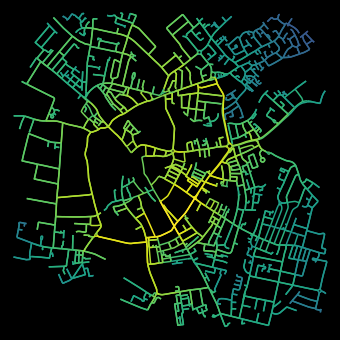

In [52]:
nx.set_edge_attributes(G_general,edge_cc,'cc') 
ev = list(nx.get_edge_attributes(G_general,'cc').values())
norm = colors.Normalize(vmin=min(ev)*0.6, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.viridis)
ec = [cmap.to_rgba(cl) for cl in ev]
fig, ax = ox.plot_graph(G_general, bgcolor='k', axis_off=True, node_size=0, node_color='w', 
                        node_edgecolor='black', node_zorder=2,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1)
map1 = (fig, ax)

In [57]:
#Plotting the whole dataset check-in locations
mc = MarkerCluster()
map_general = folium.Map([x, y], zoom_start = 14)
for row in df.itertuples():
    mc.add_child(folium.Marker(location=[row.lat, row.lon]))
map_general = map_general.add_child(mc)
map_general


In [ ]:
#Matching closeness centrality graph with all check-in locations (very long to load...)

map_final = ox.plot.plot_graph_folium(G_general, graph_map=None, popup_attribute=None, zoom=10, fit_bounds=True, edge_color=ec, edge_width=5, edge_opacity=1)
for row in df.itertuples():
    mc.add_child(folium.Marker(location=[row.lat, row.lon]))
map_final = map_final.add_child(mc)
map_final